In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# load data

dataX=pd.read_csv("/content/drive/My Drive/traindata/trainX.csv")
dataA=pd.read_csv("/content/drive/My Drive/traindata/trainA.csv")
dataY=pd.read_csv("/content/drive/My Drive/traindata/trainY.csv")

# remove index

dataX=dataX.values[:,1:]
dataY=dataY.values[:,1:-1]
dataA=dataA.values[:,1:]

In [ ]:
np.where(dataA==1)[0]

array([  4,   5,   9,  11,  13,  14,  19,  26,  35,  38,  40,  42,  43,
        44,  45,  49,  51,  53,  54,  61,  63,  64,  67,  69,  72,  73,
        76,  78,  79,  81,  82,  83,  85,  88,  90,  94,  95,  98, 102,
       103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 123, 125, 126,
       128, 130, 133, 135, 139, 141, 143, 146, 147, 150, 159, 162, 167,
       168, 171, 173, 177, 181, 183, 184, 186, 187, 188, 189, 190, 192,
       193, 195, 196, 200, 201, 203, 206, 210, 212, 214, 216, 218, 221,
       223, 226, 227, 230, 233, 238, 240, 243, 244, 254, 255, 260, 263,
       264, 266, 270, 276, 277, 280, 283, 289, 292, 294, 297, 298, 299,
       300, 301, 306, 311, 312, 315, 318, 321, 322, 323, 325, 329, 331,
       332, 333, 336, 338, 343, 346, 348, 350, 352, 354, 357, 358, 359,
       361, 364, 365, 367, 376, 377, 382, 383, 384, 387, 390, 392, 393,
       397, 398, 399, 404, 405, 407, 409, 411, 412, 417, 418, 419, 421,
       429, 433, 434, 439, 441, 448, 449, 450, 451, 457, 459, 46

In [ ]:
dataX.shape

(666, 17)

In [ ]:
# split cure or not cure

data_CX=dataX[np.where(dataA==1)[0]]
dataNCX=dataX[np.where(dataA!=1)[0]]
data_CY=dataY[np.where(dataA==1)]
dataNCY=dataY[np.where(dataA!=1)]

In [ ]:
data_CX

array([[0.82, 0.  , 0.26, ..., 0.82, 0.37, 0.09],
       [0.78, 0.32, 0.62, ..., 0.89, 0.86, 0.32],
       [0.52, 0.03, 0.7 , ..., 0.39, 0.37, 0.95],
       ...,
       [0.41, 0.07, 0.99, ..., 0.09, 0.16, 0.33],
       [0.5 , 0.99, 0.61, ..., 0.73, 0.76, 0.01],
       [0.62, 0.19, 0.51, ..., 0.19, 0.39, 0.17]])

In [ ]:
data_CY

array([2.0700e+00, 1.6530e+01, 4.8100e+00, 2.7000e-01, 5.2800e+00,
       1.5000e-01, 3.4210e+01, 4.6730e+01, 3.4000e-01, 2.9000e-01,
       1.7000e-01, 4.7000e-01, 0.0000e+00, 9.0000e-02, 4.9100e+00,
       1.0000e-01, 1.0700e+01, 3.4900e+01, 4.0000e-02, 9.0000e-02,
       1.4000e-01, 7.2400e+00, 1.0000e-01, 9.8000e-01, 0.0000e+00,
       5.6000e+00, 4.6820e+01, 4.6000e-01, 8.7700e+00, 1.3000e-01,
       1.4000e-01, 1.2000e-01, 1.0000e-01, 1.0000e-01, 3.3600e+00,
       4.3000e-01, 6.0000e-02, 1.7000e-01, 1.2000e-01, 1.1700e+00,
       6.2000e-01, 1.9000e-01, 2.3000e-01, 2.3000e-01, 9.8000e-01,
       3.2000e-01, 2.2000e-01, 2.4850e+01, 7.5000e-01, 0.0000e+00,
       2.3700e+00, 3.2000e-01, 1.1000e-01, 2.1000e+00, 8.0000e-02,
       1.0000e-01, 1.4000e-01, 3.3200e+00, 1.0750e+01, 6.1130e+01,
       1.4440e+01, 2.3800e+00, 9.8900e+00, 8.7400e+00, 1.4878e+02,
       5.1000e-01, 1.2400e+00, 2.6000e-01, 9.6900e+00, 1.6800e+00,
       4.3000e+00, 5.5900e+00, 1.0000e+00, 2.0600e+00, 5.8000e

In [ ]:
from sklearn.model_selection import train_test_split

train_data_C,test_data_C,train_targets_C,test_targets_C=train_test_split(data_CX,data_CY)
train_dataNC,test_dataNC,train_targetsNC,test_targetsNC=train_test_split(data_CX,data_CY)


In [ ]:
mean_C = train_data_C.mean(axis=0)
train_data_C -= mean_C
std_C = train_data_C.std(axis=0)
train_data_C /= std_C

test_data_C -= mean_C
test_data_C /= std_C


meanNC = train_dataNC.mean(axis=0)
train_dataNC -= meanNC
stdNC = train_dataNC.std(axis=0)
train_dataNC /= stdNC

test_dataNC -= meanNC
test_dataNC /= stdNC

In [ ]:
from keras import models
from keras import layers

def build_model_C():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data_C.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model


def build_modelNC():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_dataNC.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model

In [ ]:
# cure

k = 4
num_val_samples = len(train_data_C) // k
num_epochs = 100
all_scores_C = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data_C[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets_C[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data_C[:i * num_val_samples],
         train_data_C[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets_C[:i * num_val_samples],
         train_targets_C[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model_C = build_model_C()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model_C.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model_C.evaluate(val_data, val_targets, verbose=0)
    all_scores_C.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
# not cure

k = 4
num_val_samples = len(train_dataNC) // k
num_epochs = 100
all_scoresNC = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_dataNC[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targetsNC[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_dataNC[:i * num_val_samples],
         train_dataNC[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targetsNC[:i * num_val_samples],
         train_targetsNC[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    modelNC = build_modelNC()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    modelNC.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = modelNC.evaluate(val_data, val_targets, verbose=0)
    all_scoresNC.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
all_scores_C,np.mean(all_scores_C)


([8.4889554977417, 8.77194595336914, 7.814041614532471, 2.158186912536621],
 6.808282494544983)

In [ ]:
all_scoresNC,np.mean(all_scoresNC)


([3.3558459281921387,
  4.1907854080200195,
  1.9038596153259277,
  3.2602269649505615],
 3.177679479122162)

In [ ]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [ ]:
# cure

num_epochs = 1000
all_mae_histories_C = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data_C[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets_C[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data_C[:i * num_val_samples],
         train_data_C[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets_C[:i * num_val_samples],
         train_targets_C[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model_C = build_model_C()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model_C.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories_C.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
# not cure

num_epochs = 1000
all_mae_historiesNC = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_dataNC[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targetsNC[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_dataNC[:i * num_val_samples],
         train_dataNC[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targetsNC[:i * num_val_samples],
         train_targetsNC[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    modelNC = build_modelNC()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = modelNC.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_historiesNC.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
average_mae_history_C = [
    np.mean([x[i] for x in all_mae_histories_C]) for i in range(num_epochs)]

average_mae_historyNC = [
    np.mean([x[i] for x in all_mae_historiesNC]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

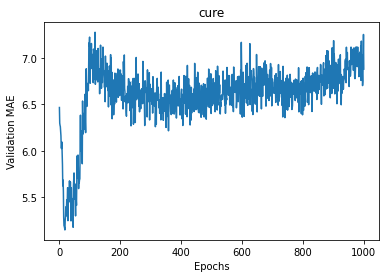

In [ ]:
plt.plot(range(1, len(average_mae_history_C) + 1), average_mae_history_C)
plt.title('cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

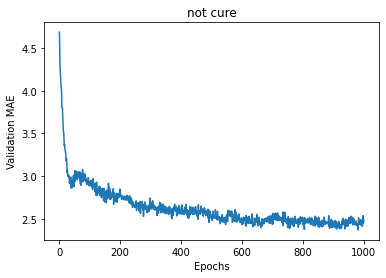

In [ ]:
plt.plot(range(1, len(average_mae_historyNC) + 1), average_mae_historyNC)
plt.title('not cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

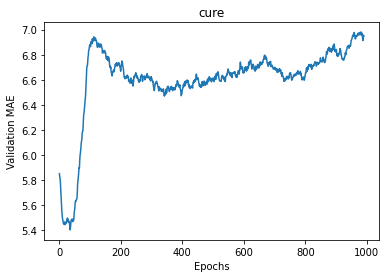

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_C = smooth_curve(average_mae_history_C[10:])

plt.plot(range(1, len(smooth_mae_history_C) + 1), smooth_mae_history_C)
plt.title('cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

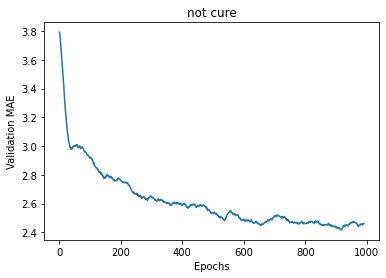

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_historyNC = smooth_curve(average_mae_historyNC[10:])

plt.plot(range(1, len(smooth_mae_historyNC) + 1), smooth_mae_historyNC)
plt.title('not cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

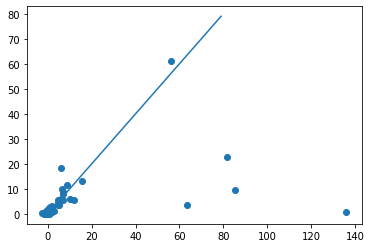

In [ ]:
pred_targets=model_C.predict(test_data_C)

plt.scatter(pred_targets,test_targets_C)
plt.plot(np.arange(80),np.arange(80))

### 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pred_targets, test_targets_C)

model.coef_, model.intercept_ 

(array([0.14901023], dtype=float32), 2.5422845)

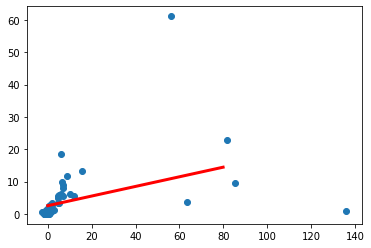

In [ ]:
xs = np.arange(0, 80, 0.1)
ys = xs*model.coef_[0] + model.intercept_

plt.scatter(pred_targets,test_targets_C)
plt.plot(xs,ys,'r-',lw=3)

### 2차식 회귀

In [ ]:
X = np.c_[pred_targets, pred_targets**2]
y = test_targets_C

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([ 0.7733275 , -0.00596506], dtype=float32), 1.1481879)

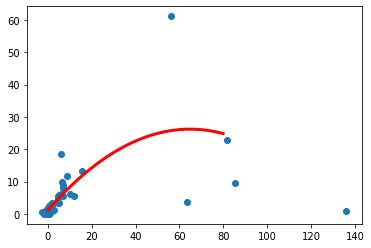

In [ ]:
xs = np.arange(0,80,0.1)
ys = xs*model.coef_[0] + (xs**2)*model.coef_[1] + model.intercept_

plt.scatter(pred_targets,test_targets_C)
plt.plot(xs,ys,'r-',lw=3)

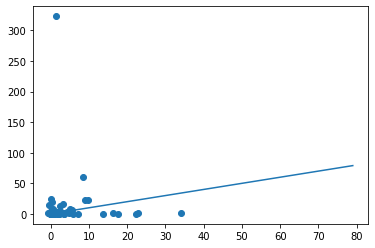

In [ ]:
pred_targets=modelNC.predict(test_data_C)

plt.scatter(pred_targets,test_targetsNC)
plt.plot(np.arange(80),np.arange(80))

In [ ]:
test_data_C.shape

(67, 17)

In [ ]:
train_data_C.shape

(200, 17)

In [ ]:
test_data_C[0]

array([ 0.42764771,  0.2432253 ,  0.38916371, -1.43156813, -0.43454781,
        0.51529907, -0.62008939, -0.87840581,  1.41949014,  0.70044102,
        1.27037422, -0.80303838,  1.68867679, -0.80347079,  0.9057575 ,
       -1.15400359, -0.21239652])

In [ ]:
time_C=model_C.predict(test_data_C)[0]
timeNC=modelNC.predict(test_data_C)[0]

if time_C > timeNC:
  print('치료하세용')
else:
  print('치료하지 마세용')

print(test_targets_C[0],time_C,timeNC,time_C-timeNC)



치료하지 마세용
0.14 [-0.01491208] [1.0328317] [-1.0477438]


In [ ]:
import lightgbm

In [ ]:
import tensorflow as tf

In [ ]:
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
# 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
X = tf.keras.layers.Input(shape=[17])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
# 3.데이터로 모델을 학습(FIT)합니다.
model.fit(train_data_C, train_targets_C, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 4ms/step - loss: 53.3560
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 46.2340
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 31.5782
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 46.1605
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 89.4091
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 23.8837
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 81.8731
Epoch 8/1000
7/7 [==============================] - 0s 4ms/step - loss: 35.7218
Epoch 9/1000
7/7 [==============================] - 0s 4ms/step - loss: 34.1551
Epoch 10/1000
7/7 [==============================] - 0s 4ms/step - loss: 35.1507
Epoch 11/1000
7/7 [==============================] - 0s 4ms/step - loss: 26.2199
Epoch 12/1000
7/7 [==============================] - 0s 4ms/step - loss: 22.6212
Epoch 13/1000
7/7 [==================

In [ ]:
# 4. 모델을 이용합니다
print(model.predict(test_data_C))
# 종속변수 확인
print(test_target_C)

[[  1.527569  ]
 [ 11.758342  ]
 [  3.7794893 ]
 [ 22.324232  ]
 [ 17.657131  ]
 [  2.9666274 ]
 [  5.7278314 ]
 [  2.7606936 ]
 [  0.89776164]
 [ 10.379427  ]
 [  2.0949361 ]
 [  1.52759   ]
 [  2.3201146 ]
 [128.6864    ]
 [  9.463589  ]
 [ 11.152736  ]
 [  1.1193364 ]
 [  1.114969  ]
 [  2.1361902 ]
 [ -1.1694133 ]
 [  1.2791879 ]
 [  1.671869  ]
 [  7.9131374 ]
 [  1.7853792 ]
 [  0.887451  ]
 [  1.358916  ]
 [  1.6126177 ]
 [ -1.5369687 ]
 [  1.4227974 ]
 [  0.8340174 ]
 [ -0.6503748 ]
 [  8.210956  ]
 [  8.153859  ]
 [  0.26635718]
 [  1.0798872 ]
 [  0.7398413 ]
 [ 23.017946  ]
 [  1.9622667 ]
 [  1.1714594 ]
 [  3.479739  ]
 [  4.9158545 ]
 [ -0.72540396]
 [ -0.52221924]
 [  5.2052217 ]
 [ -0.40816945]
 [  0.33875132]
 [  0.75499886]
 [  1.6718688 ]
 [  1.257724  ]
 [  3.758288  ]
 [  2.8448477 ]
 [  2.4394631 ]
 [  7.4526234 ]
 [  1.5147426 ]
 [  5.946475  ]
 [  0.9925893 ]
 [  7.9756436 ]
 [  1.4004757 ]
 [  4.3080688 ]
 [ 52.421345  ]
 [  2.7660363 ]
 [ 36.2343    ]
 [  0.26

NameError: ignored